In [151]:
#import dependencies and create dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
from sklearn.decomposition import PCA

from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

traindf = pd.read_csv('/Users/pierce/Documents/Ex 3/Outputs/mean_data.csv', index_col = 0)

print(traindf.shape)
traindf.head()

(51, 840)


,4000.0,3996.0,3992.0,3988.0,3984.0,3980.0,3976.0,3972.0,3968.0,3964.0,...,680.0,676.0,672.0,668.0,664.0,660.0,656.0,652.0,648.0,MA Concentration (%)
0,0.037529,0.037200,0.036063,0.034756,0.034155,0.034256,0.034427,0.034346,0.034022,0.033381,...,0.425100,0.383174,0.221374,0.158417,0.144656,0.071328,-0.022429,-0.011375,0.021373,0
1,0.036592,0.036220,0.035414,0.034569,0.034161,0.033985,0.033576,0.033035,0.032802,0.032915,...,0.436970,0.310117,0.141687,0.141123,0.153709,0.082989,-0.030152,-0.008107,0.025487,2
2,0.021278,0.020515,0.019654,0.018982,0.018785,0.018838,0.018647,0.018157,0.017792,0.017826,...,0.409406,0.338523,0.201697,0.165580,0.166315,0.078868,0.012764,0.074717,0.062256,4
3,0.031978,0.031628,0.030771,0.029914,0.029670,0.029922,0.030035,0.029710,0.029159,0.028678,...,0.442701,0.376764,0.235963,0.203917,0.167887,0.087845,0.016016,0.025232,0.036247,6
4,0.037743,0.037662,0.037147,0.036308,0.035602,0.035140,0.034711,0.034293,0.034000,0.033764,...,0.355220,0.288831,0.168479,0.130611,0.120371,0.074645,0.012362,0.027254,0.036057,8


In [152]:
#create individual DataFrames for the test data
df2080 = pd.read_csv('/Users/pierce/Documents/Ex 4/Polymerization Data/20MA80ST/20ma80st.csv', index_col = 0).transpose()
df2080.index = ['20ma80st']

df5050 = pd.read_csv('/Users/pierce/Documents/Ex 4/Polymerization Data/50MA50ST/50ma50st.csv', index_col = 0).transpose()
df5050.index = ['50ma50st']

df8020 = pd.read_csv('/Users/pierce/Documents/Ex 4/Polymerization Data/80MA20ST/80ma20st.csv', index_col = 0).transpose()
df8020.index = ['80ma20st']

In [153]:
#create list for pd.concat to iterate through
testdflist = [df2080, df5050, df8020]

#concatenate the test data DataFrames
#need to add '.0' to the end of each column label so that they match with the labels on traindf columns
testdf = pd.concat(testdflist).add_suffix('.0')

#add concentration column to df
conc = [None, None, None]
testdf['MA Concentration (%)'] = conc

display(testdf)

Wavenumbercm-1,4000.0,3996.0,3992.0,3988.0,3984.0,3980.0,3976.0,3972.0,3968.0,3964.0,...,680.0,676.0,672.0,668.0,664.0,660.0,656.0,652.0,648.0,MA Concentration (%)
20ma80st,0.009043,0.007224,0.005576,0.004215,0.003626,0.004064,0.004890,0.005249,0.005119,0.005099,...,0.341458,0.262371,0.146937,0.162876,0.183429,0.078459,0.021142,0.073608,0.110612,None
50ma50st,0.011316,0.009596,0.008244,0.007183,0.006638,0.006890,0.007685,0.008445,0.008882,0.009065,...,0.262646,0.215734,0.163400,0.148762,0.173055,0.120999,0.114198,0.140736,0.108769,None
80ma20st,0.009614,0.008414,0.007367,0.006135,0.005028,0.004532,0.004588,0.004947,0.005641,0.006544,...,0.279632,0.242178,0.161582,0.144930,0.169449,0.094860,0.042414,0.055312,0.118591,None


In [154]:
#concatenate the test and training DataFrames together
dflist = [traindf, testdf]
df = pd.concat(dflist)
df.head()

,4000.0,3996.0,3992.0,3988.0,3984.0,3980.0,3976.0,3972.0,3968.0,3964.0,...,680.0,676.0,672.0,668.0,664.0,660.0,656.0,652.0,648.0,MA Concentration (%)
0,0.037529,0.037200,0.036063,0.034756,0.034155,0.034256,0.034427,0.034346,0.034022,0.033381,...,0.425100,0.383174,0.221374,0.158417,0.144656,0.071328,-0.022429,-0.011375,0.021373,0
1,0.036592,0.036220,0.035414,0.034569,0.034161,0.033985,0.033576,0.033035,0.032802,0.032915,...,0.436970,0.310117,0.141687,0.141123,0.153709,0.082989,-0.030152,-0.008107,0.025487,2
2,0.021278,0.020515,0.019654,0.018982,0.018785,0.018838,0.018647,0.018157,0.017792,0.017826,...,0.409406,0.338523,0.201697,0.165580,0.166315,0.078868,0.012764,0.074717,0.062256,4
3,0.031978,0.031628,0.030771,0.029914,0.029670,0.029922,0.030035,0.029710,0.029159,0.028678,...,0.442701,0.376764,0.235963,0.203917,0.167887,0.087845,0.016016,0.025232,0.036247,6
4,0.037743,0.037662,0.037147,0.036308,0.035602,0.035140,0.034711,0.034293,0.034000,0.033764,...,0.355220,0.288831,0.168479,0.130611,0.120371,0.074645,0.012362,0.027254,0.036057,8


In [155]:
#define training variables
#define X variable and confirm its shape

#X needs to emcompass all data for preprocessing and PCA
#will be broken into labelled and unlabelled data later
X = df.values[:,:-1].astype('float')
print(X.shape)

#define y
y = df.values[:-3,-1].astype('float')
print(len(y))


(54, 839)
51


In [156]:
# Preprocessing (1): first derivative
d1X = savgol_filter(X, 51, polyorder = 5, deriv=1)

# Preprocess (2) Standardize features by removing the mean and scaling to unit variance
Xstd = StandardScaler().fit_transform(d1X[:,:])

In [157]:
#create PCA and print the explained variance ratios and sums


pca = PCA(n_components = 0.95, random_state = 2020)
#random_state is a seed to stop randomness from changing results across trials - just used a random number
#Setting n_components as float tells the function to include as many components as necessary to explain the float level of variance
Xreg = pca.fit_transform(Xstd)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_ * 100))
print(len(pca.components_))


[0.47520691 0.25373973 0.12482987 0.03249018 0.02015174 0.01438581
 0.01036191 0.00957695 0.00875497 0.00707655]
95.65746167509596
10


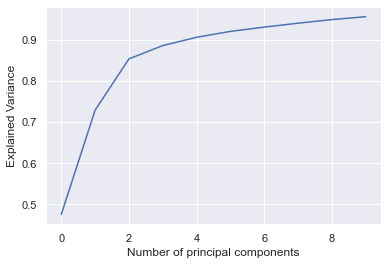

In [158]:
#plot explained variance ratio vs n components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Explained Variance')
plt.savefig('elbow_plot.png', dpi=100)

In [159]:
#break Xreg into labelled and unlabelled data
print(Xreg.shape)

Xlab = Xreg[:-3,:]
print(Xlab.shape)

Xpred = Xreg[-3:,:]
print(Xpred.shape)

ma20 = Xreg[-3, :]
ma50 = Xreg[-2, :]
ma80 = Xreg[-1, :]

(54, 10)
(51, 10)
(3, 10)


In [160]:
# Create linear regression object 
regr = linear_model.LinearRegression() 
# Fit 
regr.fit(Xlab, y) 
# Calibration 
y_c = regr.predict(Xlab) 
# Cross-validation 
y_cv = cross_val_predict(regr, Xlab, y, cv=10) 
# Calculate scores for calibration and cross-validation 
score_c = r2_score(y, y_c) 
score_cv = r2_score(y, y_cv)
# Calculate mean square error for calibration and cross validation 
mse_c = mean_squared_error(y, y_c) 
mse_cv = mean_squared_error(y, y_cv)

#Calculate root mean squared error for calibration and cross validation
rmse_c = mean_squared_error(y, y_c, squared= False)
rmse_cv = mean_squared_error(y, y_cv, squared= False)

#Calculate mean absolute error for calibration and cross validation
mae_c = mean_absolute_error(y,y_c)
mae_cv = mean_absolute_error(y,y_cv)

#return(y_cv, score_c, score_cv, mse_c, mse_cv)
print(y_c)
print(y_cv)
print('Calibration R^2:\n', score_c)
print('Calibration MSE\n', mse_c)
print('Calibration RMSE\n', rmse_c)
print('Calibration MAE\n', mae_c)

print('Cross-Validation R^2:\n', score_cv)
print('Cross-Validation MSE\n', mse_cv)
print('Cross_Validation RMSE\n', rmse_cv)
print('Cross_Validation MAE\n', mae_cv)

[ 3.41547756  3.42260154  5.07625521  5.62008337  5.41369837  8.47586848
 12.70991046  6.22579181 15.09207293 16.23535276 19.09396552 19.8840659
 23.64019193 25.2308866  28.34346251 32.1203972  31.92997254 34.45087055
 39.67271626 37.31997093 38.22410633 35.12442982 41.61187622 47.88081856
 52.61743558 59.27872839 61.70902107 53.35009161 54.87812937 61.91363073
 66.86541127 65.80118847 68.22069242 65.24677854 75.85930203 78.1389679
 77.21777499 78.65779279 81.79598557 80.70875037 83.68993773 82.58892645
 85.21727192 86.39756145 81.00712075 78.03276873 82.11258502 82.27022352
 93.19858676 86.60462666 90.40586653]
[14.22193528 11.3353124  19.50723251 14.64802348 13.58297566 13.91538782
 11.71635735  3.2124926   3.37452093 17.01207694 19.08269323 19.48481413
 23.44317379 25.01307727 28.25366674 32.09143428 31.96230678 34.40394953
 40.15379359 37.17291621 38.00979561 34.0900525  41.85240933 48.01701259
 53.13291837 59.42672185 65.78278413 53.79300602 51.73381978 60.86791934
 69.42713486 66

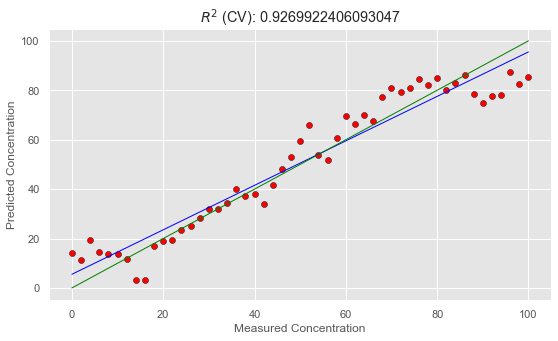

In [161]:
# Regression plot
z = np.polyfit(y, y_cv, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y, y_cv, c='red', edgecolors='k')
    ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('$R^{2}$ (CV): '+str(score_cv))
    plt.xlabel('Measured Concentration')
    plt.ylabel('Predicted Concentration')
    plt.show()
    

In [162]:
regr.predict(Xpred)

array([31.86732704, 32.43014765, 37.58252871])

In [163]:
regr.predict(ma20.reshape(1, -1))

array([31.86732704])